## Assignment - A3.part2
### Devin Hall, Tyler Birnie
### Due: 3-25-22 @ 11:59pm
Some pre-requisites we will need for this project

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
import sklearn.decomposition

### Question 1: Pokemon Data
Load in the data, look at the distribution of Pokemon skills (data features) we will use for dimenionality reduction. "HP, Attack, Defense, SpAtk, SpDef, and Speed"

In [144]:
pData = pd.read_csv("Pokemon.csv") #read in entire Pokemon.csv file
pData.head(10)

,Num,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


#### Question 1A:
create a violin plot showing the distribution of these variables
Helpful functions: python- seaborn package; violinplot


In [141]:
import warnings    #notebook generated depreciation errors for future updates
                    #removed warnings for just this instance

with warnings.catch_warnings(record=True):
    pData.Name = pData.Name.str.replace(".*(?=Mega)", "") #remove extra name spaces
    pData['Type2'].fillna(pData['Type1'], inplace=True) #replace all non values
    new_data=pData.copy() #make a copy of pData
    new_data.drop(["Num","Total","Generation","Legendary"], 1, inplace=True) #drop columns we are not interested in


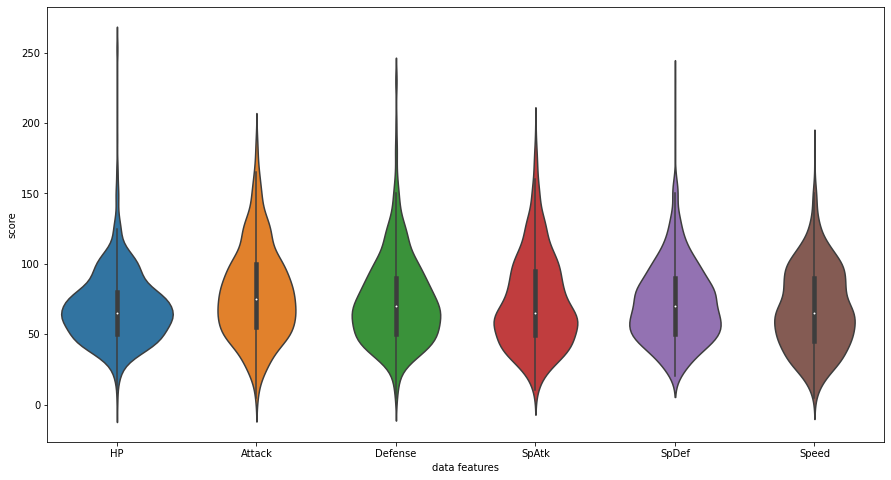

In [142]:
figure = plt.figure(figsize=(15,8))  #create figure size

plt.xlabel('data features')          #xlabel

plt.ylabel('score')                  #ylabel

sns.violinplot(data=new_data)        #violinplot

plt.show()                           #show everything

#### Question 1B: 
The six features (Pokemon Skills) have different ranges, therefore we should scale the data before considering PCA. Standardize the data (center the data- subtract the mean, and divide by the standard deviation). 

_"Note, we only need to scale the data for the 6 variables under consideration"_
Helpful functions: python- StandardScaler from sklearn.preprocessing

In [140]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

newer_data = new_data.copy()

features = ['HP','Attack','Defense','SpAtk','SpDef','Speed']

#seperate out the features
x = newer_data.loc[:,features].values

#seperate out the target
y = newer_data.loc[:,['Type1']].values

#fit the data
x = scaler.fit_transform(x)

print(x)

[[-0.95062622 -0.92490618 -0.79715364 -0.2391303  -0.24818854 -0.80150318]
 [-0.3628221  -0.5241302  -0.34791742  0.21955954  0.29115635 -0.28501525]
 [ 0.42091674  0.09244823  0.29384863  0.83114599  1.01028289  0.40363531]
 ...
 [ 0.42091674  0.95565803 -0.44418232  2.36011211  2.08897269  0.05931003]
 [ 0.42091674  2.49710411 -0.44418232  2.97169856  2.08897269  0.40363531]
 [ 0.42091674  0.95565803  1.4811158   1.74852566  0.65071962  0.05931003]]


#### Quesetion 1C:
Preform principle components analysis (PCA) on the scaled Pokemon skills data. 
Helpful funcitons: PCA function sklearn.decomposition

In [132]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf= pd.DataFrame(data = principalComponents, 
                          columns=['principal component 1',
                                   'principal component 2'])

finalDf= pd.concat([principalDf,newer_data[['Type1']]], axis=1)

print(finalDf)

     principal component 1  principal component 2    Type1
0                -1.556375              -0.021482    Grass
1                -0.362867              -0.050269    Grass
2                 1.280152              -0.062720    Grass
3                 2.620916               0.704263    Grass
4                -1.758284              -0.706179     Fire
..                     ...                    ...      ...
795               2.307521               2.303187     Rock
796               3.539772              -0.811013     Rock
797               2.458216              -0.515882  Psychic
798               3.530397              -0.951065  Psychic
799               2.233786               0.537630     Fire

[800 rows x 3 columns]


#### Question 1D:
Plot the transformed data in the space defined by the first two principal components.  

[This should be a scatter plot]
helpful functions: python- matplotlib, scatter

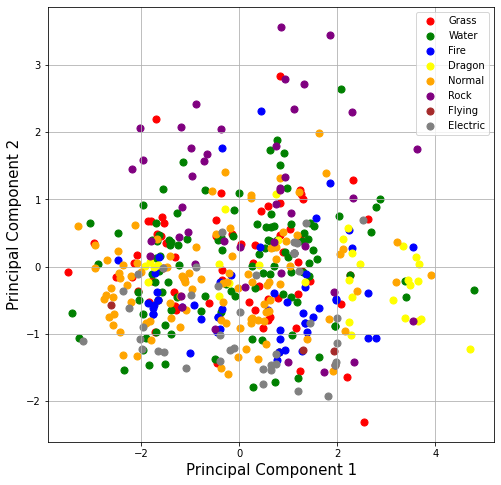

In [146]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize=15)

ax.set_ylabel('Principal Component 2', fontsize=15)

targets=['Grass','Water','Fire','Dragon','Normal','Rock','Flying','Electric']

colors= ['red','green','blue','yellow','orange','purple','brown','grey']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type1'] ==target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
              finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color, s = 50)

ax.legend(targets)

ax.grid()

#### Question 1E:
Explore the amount of variance explained by each principle component direction. 
First, plot the proportion of variance explained (y-axis) vs. the different principle components. 
Second, plot the cummulative proportion of variance explained y the principle components. Make sure this plot has y-limits from 0 - 1.
helpful functions: python- matplotlib, scatter or plot

### Question 2: College Data
The set of colleges considered are the 21 top colleges based on earning potential of undergraduates with computer science degrees: "college_data.csv" (Sources: 2014- Payscale.com and the National Center for Education Statistics, NCES)
[load the data from college_data.csv]

#### Question 2A:
Preform principal component analysis on the college data (make sure to preprare the data in any way needed)
Helpful functions: python- PCA from sklearn.decomposition

#### Questiton 2B:
Plot the dat in the space defined by the first two principal components (labeling each point with the school it represents)

#### Quesiton 2C:
Plot the amount of cumulative variance explained.
How many principal components should be used for any further analysis to be done on the data?

### Question 3: Text Classification
For this question you will be considering text classificatoin using two different Naive Bayes models. These approaches will be discussed in class and referenced from the following book.

Manning, C., Raghavan, P., Schutze, H. Introduction to Information Retrieval, Cambridge University Press, 2008
http://nlp.stanford.edu/IR-book/

In particular, look at Chapter 13 http://nlp.stanford.edu/IR-book/html/htmledition/text-classification-and-naive-bayes-1.html

You will be using data from the Presidential State of the Union Addresses available as a zip archive. The speeches are available in text files sorted by year, e.g., a1.txt, ..., a231.txt. The text files are formated such that there is one word per line and most punctuation has been removed. Note, there are still hyphens or dashes left in the text files and there may be some errors in splitting of words.

#### Quesiton 3A:
Load the addresses. You will need to create a vector listing the party affiliation of each president to match their speech, you may use the file "party.txt" to help with this classification.


#### Question 3B:
Remove _stopwords_ from consideration for the method. The stopwords are availabe at "stopwords.txt" or found in various packages nltk and 'tm.

#### Question 3C:
Predict the part affiliations (Democrat / Republican) for the following speeches:
- Donald Trump, 2017
- Barrack Obama, 2014
- George W. Bush, 2006
- William Clinton, 1995
- John F. Kennedy, 1962

The training set will be the rmaining speeches that can be associated with the Democratic or Republican presidents(note, you will not need all the addresses, but they were included here for completness of the data). You will need to complete the following steps:


##### Question 3Ci:
Create a term-document matrix, T D for this set of speeches. Restrict this matrix to the 3000 most frequently used words over all the speeches (not including the stopwords already removed). Show the first 10 rows and 5 columns.

##### Question 3Cii:
or the 5 speeches listed above determine the party affiliations of the
president. Calculate and report P (C = Dems |X) and P (C = Reb |X) under the Bernoulli model of Na ̈ıve Bayes. 
Helpful functions: sklearn.naive bayes.BernoulliNB in Python

##### Question 3Ciii:
For the 5 speeches listed above determine the party affiliations of the
president. Calculate and report P (C = Dems |X) and P (C = Reb |X) under the Multinomial model of Na ̈ıve Bayes.
Helpful functions: sklearn.naive bayes.MultinomialNB in Python 

##### Question 3Civ:
Create a plot showing the top 20 most frequenctly used words across all the Republican and Decmocrate presidents

##### Question 3Cv:
Create a plot showing the top 10 most frequently used words for Republicans and Democrats in a small multiple or faceted plot

### Question 4: Text Classification - Bonus
Repeat the analysis from above, but implement the Bernoulli Naive Bayes and Multinomial Naive Bayes models yourself. Follow the pseudocode given in the the IR book. Note,for this question you will not use the standard Na ̈ıve Bayes package, library or function.
This means you can’t use sklearn.naive bayes.BernoulliNB in Python
You can’t use sklearn.naive bayes.MultinomialNB in Python


#### Question 4A: 
For the 5 speeches listed above determine the party affiliations of
the president. Calculate and report P (C = Dems |X) and P (C = Reb |X) under the Bernoulli model of Na ̈ıve Bayes. In order to avoid underflow errors, use the log probabilities as discussed in class.

#### Question 4B: 
For the 5 speeches listed above determine the party affiliations of the
president. Calculate and report P (C = Dems |X) and P (C = Reb |X) under the Multinomial model of Na ̈ıve Bayes.

Hint: A strong suggestion for this question is to first create and test your code on a small document set, e.g., the example in the IR-book. Once you have that working correctly, then run on the SOTU addresses